# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint
#### To be done in the Lab

The objective of this experiment is to understand kmeans algorithm.

In this experiment we will be using clara dataset. The dataset contains 3000 instances with 3 features.

## k-means
K-means  is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed a priori. The main idea is to define k centroids, one for each cluster.

Let us learn the kmeans algorithm step by step.

#### 1. Loading the dataset

In [1]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

In [2]:
# Setting up the file
dataset = "AIML_DS_CLARA_STD.csv"

In [3]:
data = pd.read_csv(dataset)

#### 2. Getting the values and plotting them.

<IPython.core.display.Javascript object>


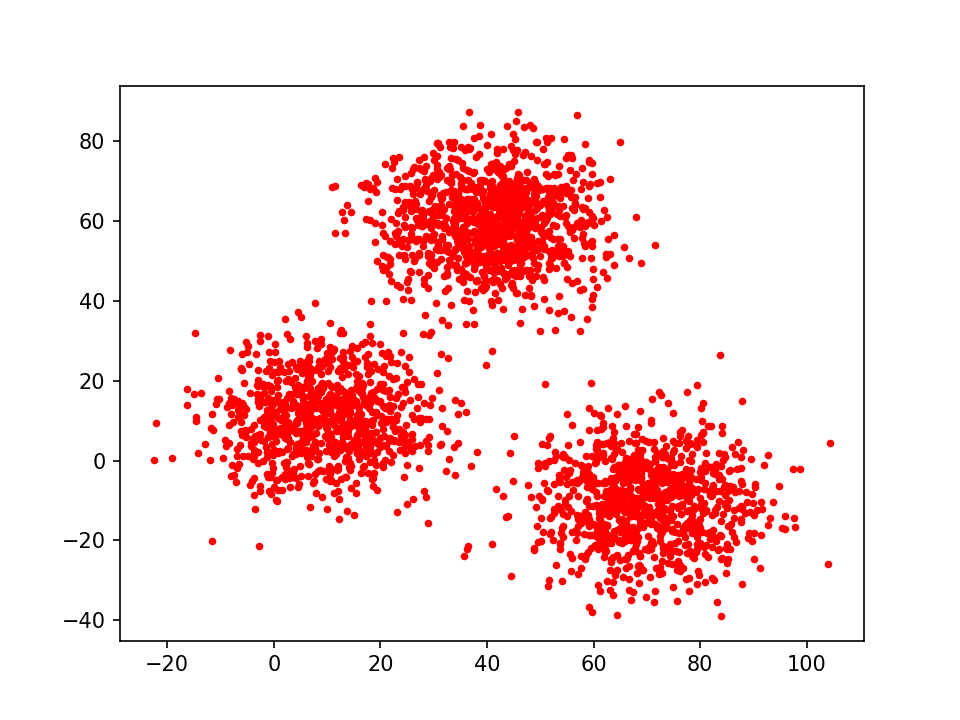

In [4]:
# Storing the values in seperate variables
f1 = data['V1'].values
f2 = data['V2'].values
# Ploting the data
%matplotlib notebook
# Combining f1 and f2 into a single array
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)
plt.show()

Now let us write a function to calculate Euclidean Distance between two vectors 'a' and 'b'.

In [5]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#### 3.We will intialize three cluster centers randomly to start the k-means algorithm.

In [6]:
# Number of clusters
k = 3
# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[41. 42.]
 [45. 62.]
 [19. 42.]]


##### This is how the data look when the algorithm get intialized.

<IPython.core.display.Javascript object>


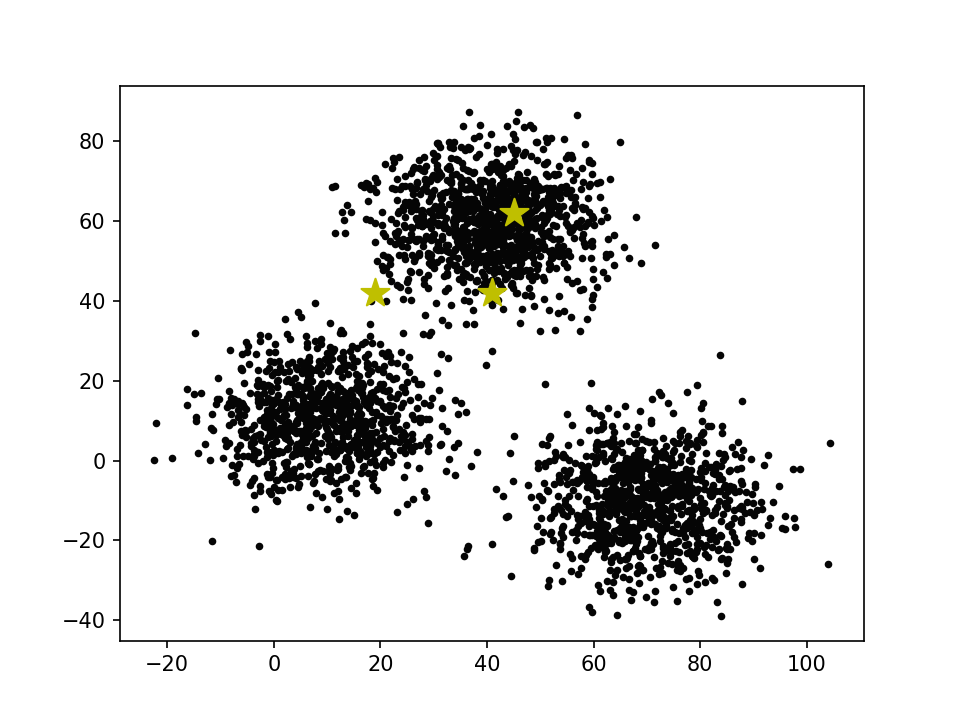

In [10]:
# Plotting along with the Centroids
%matplotlib notebook
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='y')
plt.show()

Now we will put our learning from above together and see how exactly k-means algorithm works.

### K-means algorithm 

K-means algorithm iteratively performs this two steps: 

1. The first step assigns clusters to points by assigning them to the cluster with nearest centriod. 
2. The second step calculates the new mean from the points belonging to the cluster. 

We repeat these two steps till convergence.

<IPython.core.display.Javascript object>


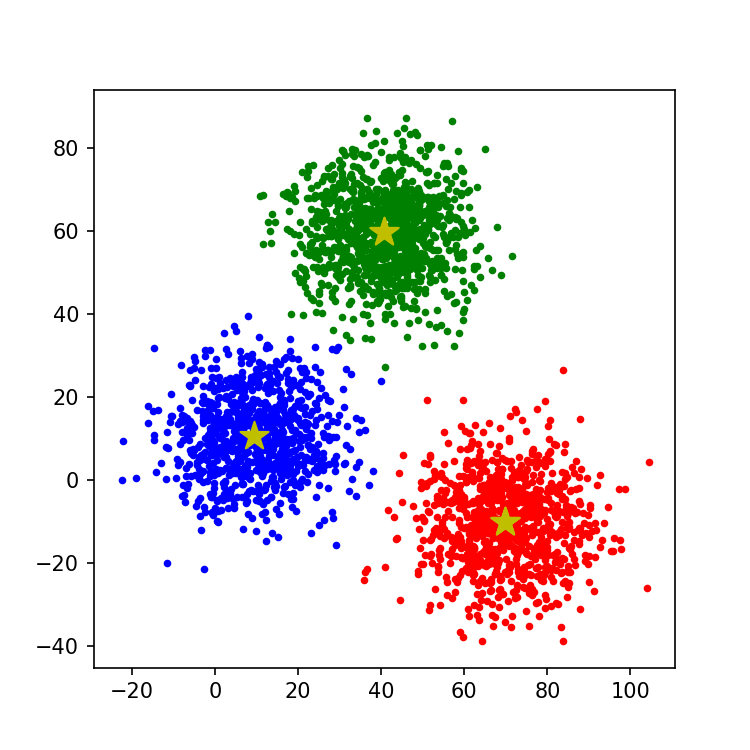

error: 55.660633
error: 13.061374
error: 0.31367457
error: 0.0


In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='y')
    fig.canvas.draw()
    time.sleep(5)
    print("error:",error)
    #plt.show()

**Exercise 1 ** change the number of cluster  and check how the plot is changing

In [9]:
# Your Code Here